# K means clustering
K-means clustering is a popular unsupervised machine learning algorithm used for partitioning a dataset into a predetermined number of clusters. The goal of K-means is to group similar data points together and discover underlying patterns or groupings within the data.

1. We need to initialize the value of centroids which are taken in random
2. If we have 2 centroids then we will have two clusters
3. Find the distance between two centroids and the data points with the help of eucledian distance
4. Select the two clusters and find the mean of the data points of each clusters
5. Move the centroid to the mean 
6. Again find the distance from the data points to the centroids
7. Then again two new clusters will be formed
8. Again new centroids are formed
9. This step continues until and unless a fixed centroid is found
10. Elbow method is used to select a K value
11. For example the K is run from a loop for 1 to 20
12. The Within cluster witihin cluster sum of square (WCSS) is calculated which means distance between the cluster and the all the data points are caluclated
13. This means that when the number of cluster is more, the plot in the elbow graph will change as the WCSS decreases as the K value increases
14. Now, at a point in elbow graph, it saturates
15. There, the K will be the point where there was an abrupt decrease in the graph

In [20]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [21]:
df = sns.load_dataset("Iris")

In [22]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


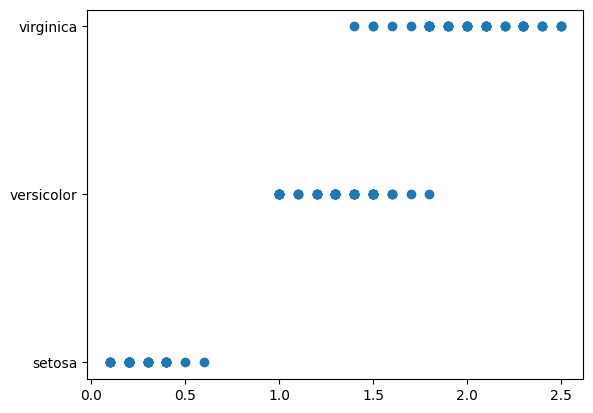

In [23]:
plt.scatter(df['petal_width'],df.species)

In [24]:
km = KMeans(n_clusters=3)

In [25]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [26]:
df['species'] = df['species'].replace({'setosa': 1, 'versicolor': 2, 'virginica': 3})


/var/folders/9b/q0txn0fd5qj57z36hsjf2yxh0000gn/T/ipykernel_40763/2238371280.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species'] = df['species'].replace({'setosa': 1, 'versicolor': 2, 'virginica': 3})


In [27]:
y_predict = km.fit_predict(df[['petal_width','species']])

/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [28]:
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [29]:
df['cluster'] = y_predict
df

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3,1
146,6.3,2.5,5.0,1.9,3,1
147,6.5,3.0,5.2,2.0,3,1
148,6.2,3.4,5.4,2.3,3,1


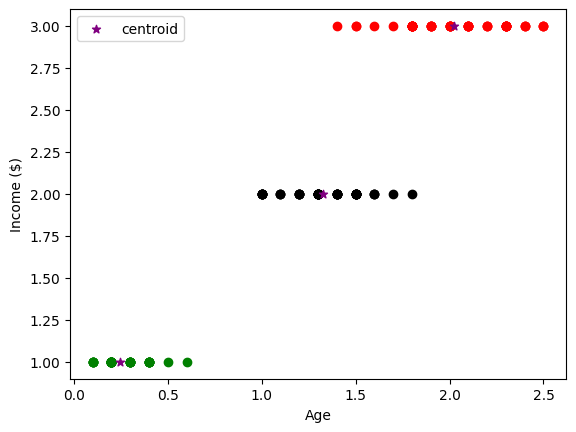

In [32]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.petal_width,df1['species'],color='green')
plt.scatter(df2.petal_width,df2['species'],color='red')
plt.scatter(df3.petal_width,df3['species'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: 

Text(0.5, 0, 'K')

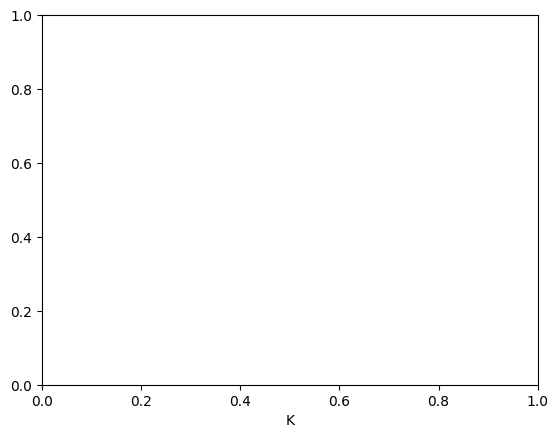

In [33]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['petal_width','species']])
    sse.append(km.inertia_)
plt.xlabel('K')

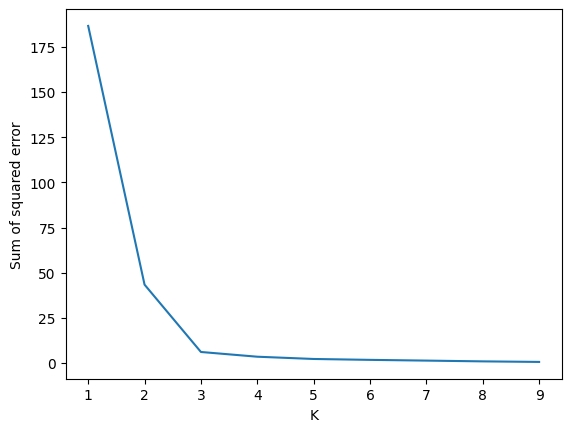

In [34]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [35]:
sse

[186.56993333333332,
 43.4066,
 6.156599999999999,
 3.53882190016103,
 2.2864530689921994,
 1.7936978354978363,
 1.3866000000000005,
 0.96199068627451,
 0.6561114845938376]

In [36]:
k_rng

range(1, 10)